In [4]:
# Importing libraries
import matplotlib.pyplot as plt  # a library to create plots
import scipy.integrate as sp_int # a special library to integrate differential equations

In [5]:
# NEW RSV Model *** Note: I left the model code with a V class instead of a T class,  but changed the graphs and interpretation in the paper


#####################################
def sirv_model(SIRV, t, mu, beta_i, beta_a, gamma_i, gamma_a, alpha, nu, epsilon):
# function for set of differential equations for our SIR model
    
    S_i, I_i, R_i, V, S_a, I_a, R_a = SIRV
    
    # How Susceptible Infants change over time - N = S+I+R
    dS_idt = mu * (S_a + I_a + R_a) - beta_i * S_i * I_a - nu * S_i

    # How Infected Infants change over time
    dI_idt = beta_i * S_i * I_a + epsilon * V - gamma_i * I_i - alpha *I_i

    # How Recovered Infants change over time
    dR_idt = gamma_i * I_i
    
    # How Vaccinateds change over time
    dVdt = nu * S_i - epsilon * V

    # How Susceptible Adults change over time - N = S+I+R
    dS_adt = -beta_a * S_a * I_a

    # How Infected Adults change over time
    dI_adt = beta_a * S_a * I_a - gamma_a * I_a

    # How Recovered Adults change over time
    dR_adt = gamma_a * I_a - mu * (S_a + I_a + R_a)
    
    return [dS_idt, dI_idt,  dR_idt, dVdt, dS_adt, dI_adt, dR_adt]

#####################################
def compute_sirv_model(S_i0, I_i0, R_i0, V_0, S_a0, I_a0, R_a0, tvalues, mu, beta_i, beta_a, gamma_i, gamma_a, alpha, nu, epsilon):
# Solve differential equations of SIR model using the scipy library and plot the results
    solution = sp_int.odeint(func=sirv_model, y0=(S_i0, I_i0, R_i0, V_0, S_a0, I_a0, R_a0), t=tvalues, args=(mu, beta_i, beta_a, gamma_i, gamma_a, alpha, nu, epsilon))
    S_i = solution[:, 0] # S_i is the size of the susceptible infant population
    I_i = solution[:, 1] # I_i is the size of the infected infant population
    R_i = solution[:, 2] # R_i is the size of the recovered infant population
    V = solution[:, 3] # V is the size of the vaccinated infant population
    S_a = solution[:, 4] # S_a is the size of the susceptible adult population
    I_a = solution[:, 5] # I_a is the size of the infected adult population
    R_a = solution[:, 6] # R_a is the size of the recovered adult population

    return S_i, I_i, R_i, V

Text(0.5, 1.0, 'SIRT Model for RSV in Population of U.S. Infants')

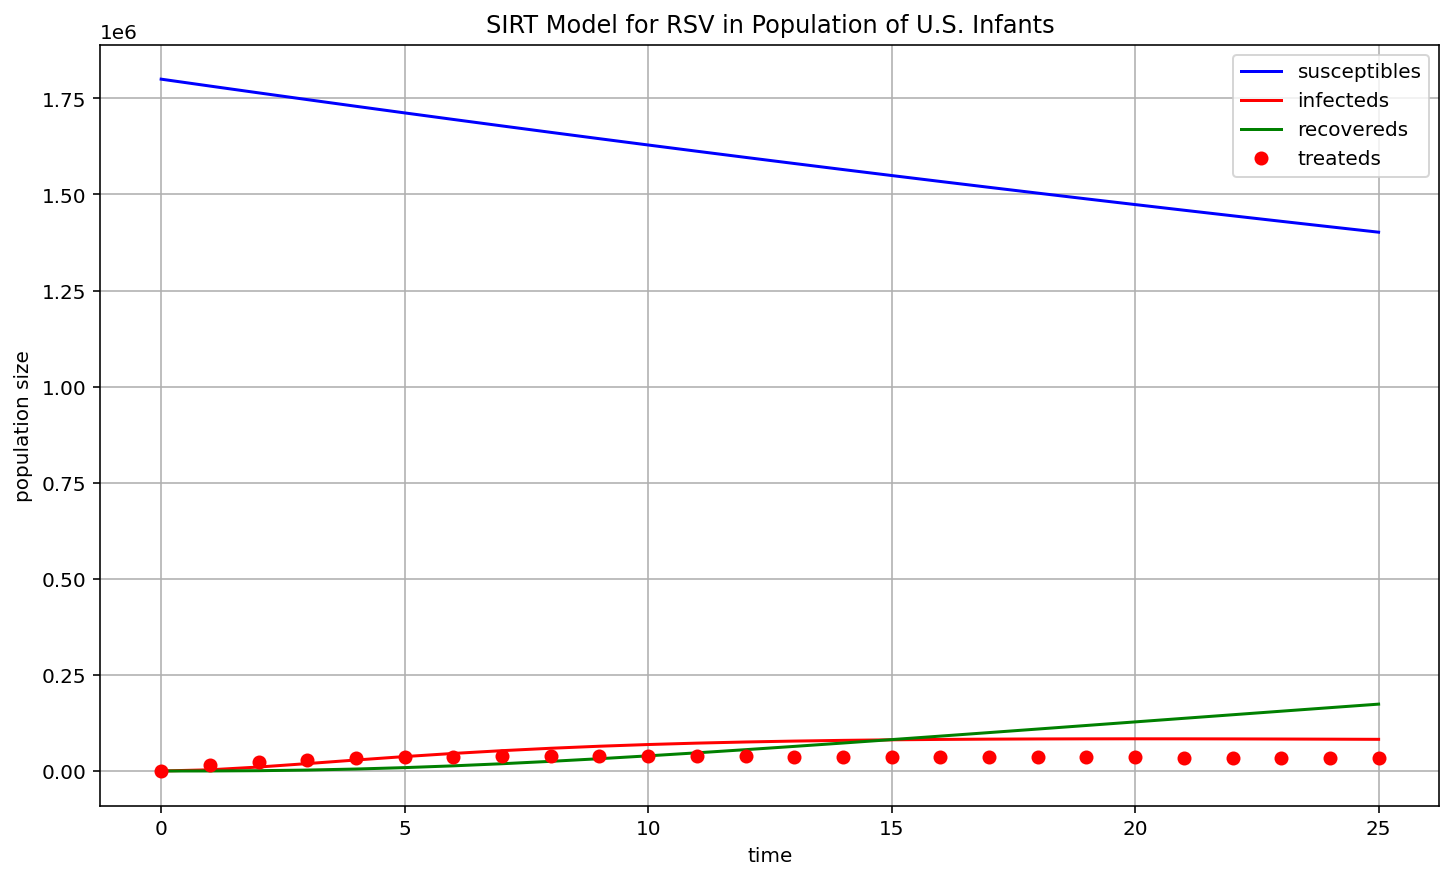

In [6]:
## Figure 1a: SIRT Epidemic Curve with 80% Abrysvo Vaccination

# Parameters

num_timesteps = 26
tvalues = range(0, num_timesteps)
S_i0 = 1800000
I_i0 = 0
R_i0 = 0
V_0 = 0
S_a0 = 331900000 
I_a0 = 1
R_a0 = 0
mu = 0
beta_i = 0.000000000000000000000000008
beta_a = 0.000000000000000000000000000006
gamma_i = 0.111
gamma_a = 0.0556
alpha = 0.069
nu = .01
epsilon = .427

S_i, I_i, R_i, V = compute_sirv_model(S_i0, I_i0, R_i0, V_0, S_a0, I_a0, R_a0, tvalues, mu, beta_i, beta_a, gamma_i, gamma_a, alpha, nu, epsilon)

#####################################
    # Plot the population sizes for susceptibles, infecteds and recovereds
plt.plot(tvalues, S_i, 'b', label='susceptibles')
plt.plot(tvalues, I_i, 'r', label='infecteds')
plt.plot(tvalues, R_i, 'g', label='recovereds')
plt.plot(tvalues, V, 'ro', label='treateds')        
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population size')
plt.grid()
plt.title("SIRT Model for RSV in Population of U.S. Infants")

89009.99196710617
32541.04566286517


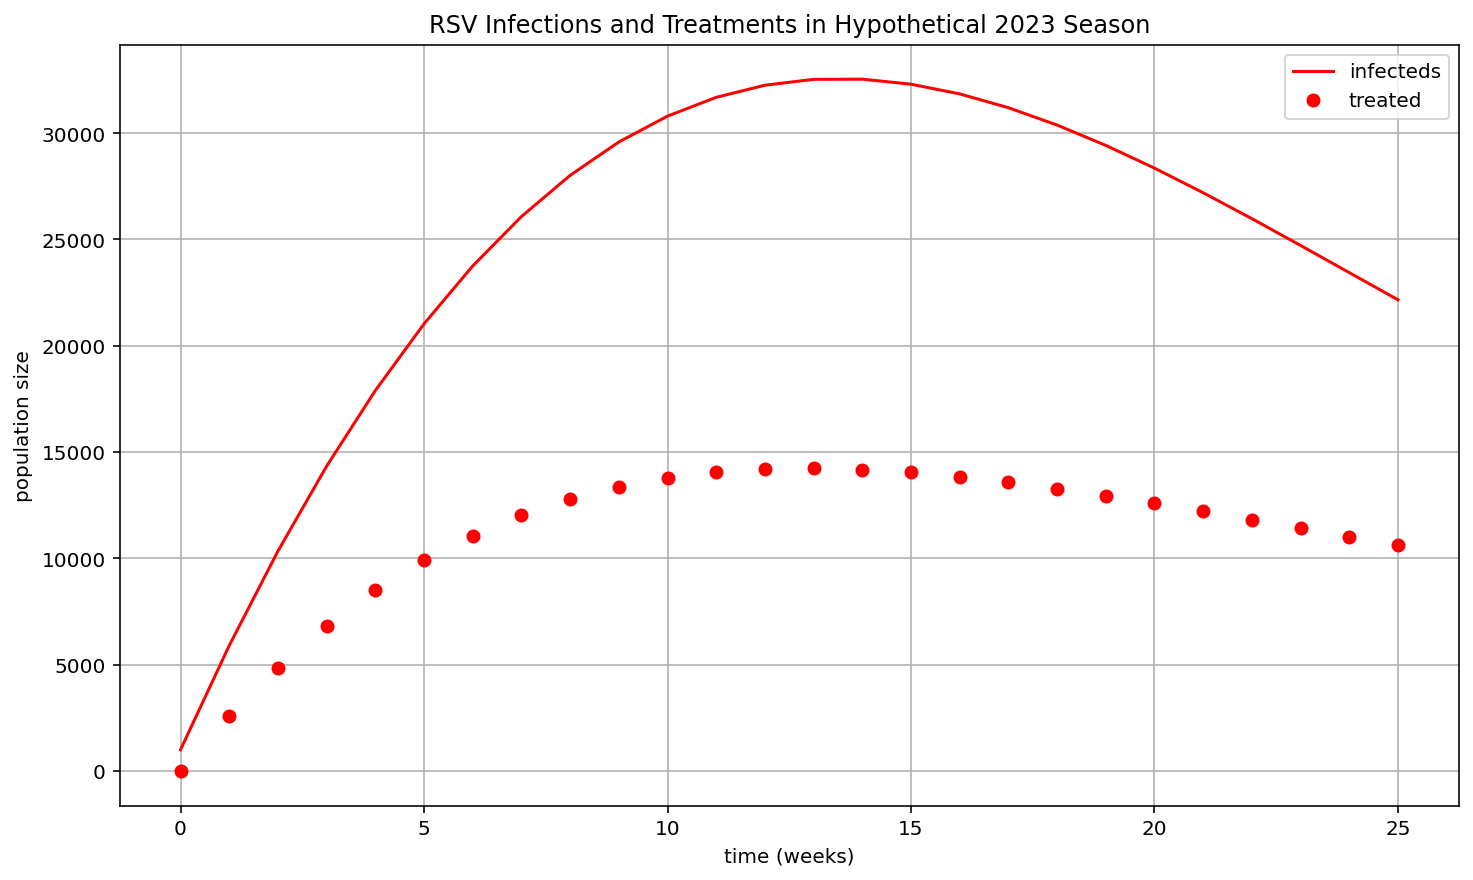

In [7]:
# Figure 1b: SIRT Model with only infecteds and treateds

# Parameters

num_timesteps = 26
tvalues = range(0, num_timesteps)
S_i0 = 90000 #800000 #1800000
I_i0 = 1000
R_i0 = 0
V_0 = 0
S_a0 = 6400000 #74000000 #331900000 
I_a0 = 6000 #6068 #600 #6068
R_a0 = 0
mu = 0
beta_i = 0.00000967 #0.0000000167 #0.000000467
beta_a = 0.0000000111 #0.0000000211 #0.00000000211
gamma_i = 0.0213 #0.111
gamma_a = 0.00426 #0.0556
alpha = 0.069
nu = 0.0308
epsilon = .04

S_i, I_i, R_i, V = compute_sirv_model(S_i0, I_i0, R_i0, V_0, S_a0, I_a0, R_a0, tvalues, mu, beta_i, beta_a, gamma_i, gamma_a, alpha, nu, epsilon)

 #####################################
    # Plot the population sizes for susceptibles, infecteds and recovereds
plt.plot(tvalues, I_i, 'r', label='infecteds')
plt.plot(tvalues, V, 'ro', label='treated')        
plt.legend(loc='best')
plt.xlabel('time (weeks)')
plt.ylabel('population size')
plt.grid()
plt.title("RSV Infections and Treatments in Hypothetical 2023 Season")

epidemic_size = S_i[0]-S_i[-1] # epidemic size equals change in susceptible population from first to last timestep
print(epidemic_size)

epidemic_peak = max(I_i)
print(epidemic_peak)

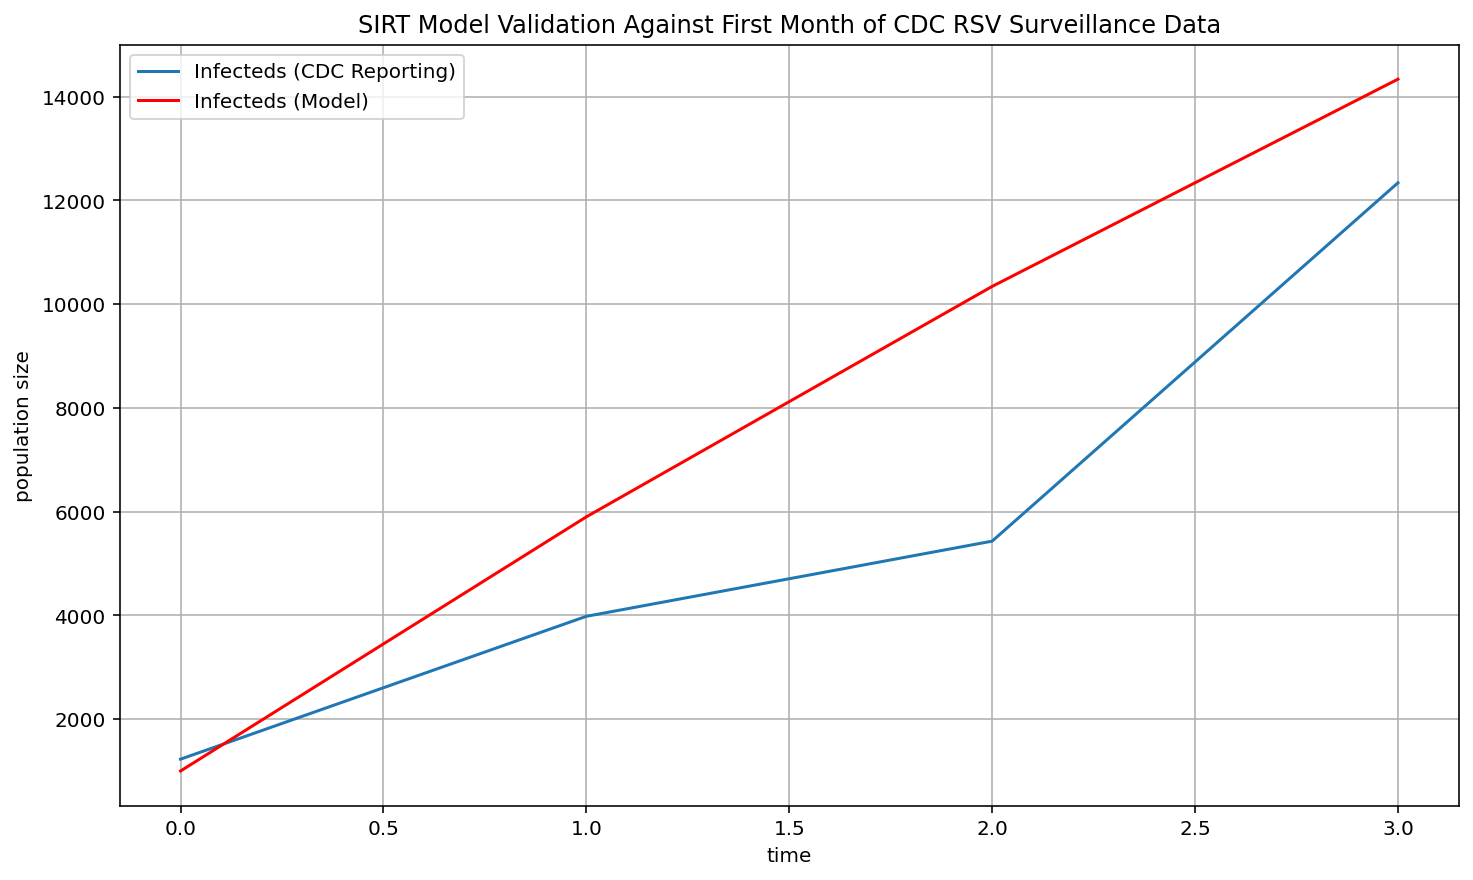

In [8]:
## Figure 2: Validating SIRT Model against October CDC Surveillance Data

# SIRT Model Validation Against First Month of CDC RSV Surveillance Data

tvalues = [0, 1, 2, 3] #  4 weeks of data

S_i, I_i, R_i, V = compute_sirv_model(S_i0, I_i0, R_i0, V_0, S_a0, I_a0, R_a0, tvalues, mu, beta_i, beta_a, gamma_i, gamma_a, alpha, nu, epsilon)

CDC_data = [1228, 3982, 5431, 12339] # case data taken from CDC RSV Surveillance

plt.plot(tvalues, CDC_data, label = 'Infecteds (CDC Reporting)')
plt.plot(tvalues, I_i, 'r', label='Infecteds (Model)')        
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population size')
plt.title('SIRT Model Validation Against First Month of CDC RSV Surveillance Data')
plt.grid()

In [9]:
# RSV Cost-Effectiveness Model


#####################################
def sirv_cost_model(SIRV, t, mu, beta_i, beta_a, gamma_i, gamma_a, alpha, nu, epsilon, cost):
# function for set of differential equations for our SIR model
    
    S_i, I_i, R_i, V, S_a, I_a, R_a, C = SIRV
    
    # How Susceptible Infants change over time - N = S+I+R
    dS_idt = mu * (S_a + I_a + R_a) - beta_i * S_i * I_a - nu * S_i

    # How Infected Infants change over time
    dI_idt = beta_i * S_i * I_a + epsilon * V - gamma_i * I_i - alpha *I_i

    # How Recovered Infants change over time
    dR_idt = gamma_i * I_i
    
    # How Vaccinateds change over time
    dVdt = nu * S_i - epsilon * V

    # How Susceptible Adults change over time - N = S+I+R
    dS_adt = -beta_a * S_a * I_a

    # How Infected Adults change over time
    dI_adt = beta_a * S_a * I_a - gamma_a * I_a

    # How Recovered Adults change over time
    dR_adt = gamma_a * I_a - mu * (S_a + I_a + R_a)
    
    # Cost over time
    dCdt = - cost * V + 0.051 * 10570 * I_i + alpha * I_i * 35864 

    
    return [dS_idt, dI_idt,  dR_idt, dVdt, dS_adt, dI_adt, dR_adt, dCdt]

#####################################
def compute_sirv_cost_model(S_i0, I_i0, R_i0, V_0, S_a0, I_a0, R_a0, C0, tvalues, mu, beta_i, beta_a, gamma_i, gamma_a, alpha, nu, epsilon, cost):
# Solve differential equations of SIR model using the scipy library and plot the results
    solution = sp_int.odeint(func=sirv_cost_model, y0=(S_i0, I_i0, R_i0, V_0, S_a0, I_a0, R_a0, C0), t=tvalues, args=(mu, beta_i, beta_a, gamma_i, gamma_a, alpha, nu, epsilon, cost))
    S_i = solution[:, 0] # S_i is the size of the susceptible infant population
    I_i = solution[:, 1] # I_i is the size of the infected infant population
    R_i = solution[:, 2] # R_i is the size of the recovered infant population
    V = solution[:, 3] # V is the size of the vaccinated infant population
    S_a = solution[:, 4] # S_a is the size of the susceptible adult population
    I_a = solution[:, 5] # I_a is the size of the infected adult population
    R_a = solution[:, 6] # R_a is the size of the recovered adult population
    C = solution[:, 7] 

    return S_i, I_i, R_i, V, C

Text(0.5, 1.0, 'Comparing Cost-Effectiveness of Abrysvo and Nirsevimab')

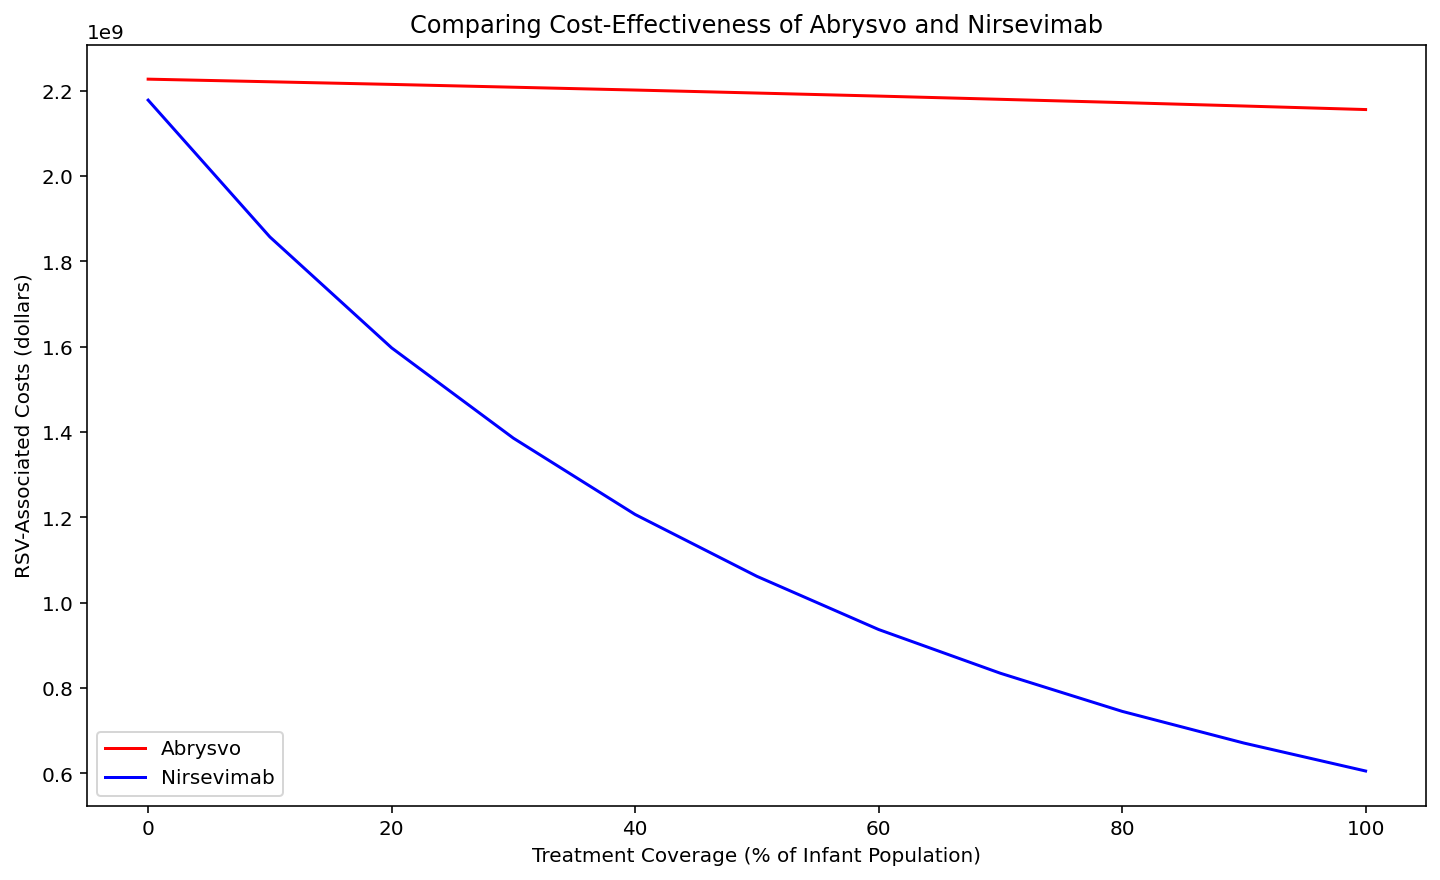

In [10]:
## Figure 3: Cost-Effectiveness of Nirsevimab vs. Abrysvo


# Nirsevimab Parameters

num_timesteps = 100
tvalues = range(0, num_timesteps)
S_i0 = 90000 #800000 #1800000
I_i0 = 1000
R_i0 = 0
V_0 = 0
S_a0 = 6400000 #74000000 #331900000 
I_a0 = 6000 #6068 #600 #6068
R_a0 = 0
C0 = 0
mu = 0
beta_i = 0.00000967 #0.0000000167 #0.000000467
beta_a = 0.0000000111 #0.0000000211 #0.00000000211
gamma_i = 0.0213 #0.111
gamma_a = 0.00426 #0.0556
alpha = 0.069
nu = 0.0308
epsilon = .489
cost = 495

S_i, I_i, R_i, V, C = compute_sirv_cost_model(S_i0, I_i0, R_i0, V_0, S_a0, I_a0, R_a0, C0, tvalues, mu, beta_i, beta_a, gamma_i, gamma_a, alpha, nu, epsilon, cost)

nirsevimab_cost_data = C
nirsevimab_infections = I_i
nirsevimab_deaths = alpha * I_i

# Abrysvo Cost Data

num_timesteps = 100
tvalues = range(0, num_timesteps)
S_i0 = 90000 #800000 #1800000
I_i0 = 1000
R_i0 = 0
V_0 = 0
S_a0 = 6400000 #74000000 #331900000 
I_a0 = 6000 #6068 #600 #6068
R_a0 = 0
C0 = 0
mu = 0
beta_i = 0.00000967 #0.0000000167 #0.000000467
beta_a = 0.0000000111 #0.0000000211 #0.00000000211
gamma_i = 0.0213 #0.111
gamma_a = 0.00426 #0.0556
alpha = 0.069
nu = 0.0308
epsilon = .27
cost = 320

S_i, I_i, R_i, V, C = compute_sirv_cost_model(S_i0, I_i0, R_i0, V_0, S_a0, I_a0, R_a0, C0, tvalues, mu, beta_i, beta_a, gamma_i, gamma_a, alpha, nu, epsilon, cost)

abrysvo_cost_data = C
abrysvo_infections = I_i
abrysvo_deaths = alpha * I_i

#  lists of cost data from above with same length as coverage_values
cost_abrysvo = [2226683122.732822, 2220554510.045369, 2214372083.8377886, 2207801489.2985306, 2201170649.3836255, 2194120819.269714, 2187003709.1540966, 2179434133.7879367, 2171769128.6974006, 2163762433.802739, 2155439622.390821]
cost_nirsevimab= [2177549146.38882, 1856896567.7295, 1596976119.96454, 1385414379.16348, 1206603147.70479, 1061651880.39474, 936980987.94385, 834512421.38933, 745222700.36734, 670920153.3301, 605411236.36954]
coverage_values = [0,10,20,30,40,50,60,70,80,90,100]

plt.plot(coverage_values, cost_abrysvo, "r", label="Abrysvo")
plt.plot(coverage_values, cost_nirsevimab, "b", label="Nirsevimab")
plt.ylabel("RSV-Associated Costs (dollars)")
plt.xlabel("Treatment Coverage (% of Infant Population)")
plt.legend()
plt.title("Comparing Cost-Effectiveness of Abrysvo and Nirsevimab")